## Hackathon - Building a Movie Recommendation System

Assume that you started working with Netfiz as a Junior Data Scientist. For your company, providing better movie recommendations is at its core and, helps improve better user experience and generate more revenue. 

Understand that:

Recommender systems make movie-watching a personalized adventure, delighting users with tailored suggestions based on their tastes.
By predicting user preferences, these systems keep users engaged, driving increased interaction with your platform.
A robust movie recommender system translates to business success. Satisfied users are loyal users, contributing to increased user retention and revenue.
Imagine the excitement of helping users discover their next favorite movie! Later during the internship program, we will ask you to create a cutting-edge movie recommendation system based on a treasure trove of user ratings. 

For now, your first task at Netfiz is to crunch the data given and answer all the questions asked below.



About Dataset: Dive into a dataset brimming with 100,836 ratings across 9,742 movies, generated by 610 users over the years. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018. Each user is represented by an id, and no other information is provided about the user. The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv`and `tags.csv`.

Click here to download the dataset
Following is a series of MCQ and subjective questions that you have to answer.

### Download the data from the above link. How many ".csv" files are available in the dataset?

In [1]:
import os

# Set the path to the directory containing the dataset
dataset_path = './'

# List all files in the directory
files = os.listdir(dataset_path)

# Filter only ".csv" files
csv_files = [file for file in files if file.endswith('.csv')]

# Print the number of ".csv" files
print("Number of .csv files:", len(csv_files))


Number of .csv files: 4


### What is the shape of "movies.csv"?


In [2]:
import pandas as pd
# Load the movies dataset
movies_df = pd.read_csv('movies.csv')

# Display the shape of the DataFrame
print("Shape of movies.csv:", movies_df.shape)

Shape of movies.csv: (9742, 3)


In [3]:
import pandas as pd

# Load the ratings dataset
ratings_df = pd.read_csv('ratings.csv')

# Display the shape of the DataFrame
print("Shape of ratings.csv:", ratings_df.shape)


Shape of ratings.csv: (100836, 4)


### How many unique "userId" are available in "ratings.csv"?


In [4]:
import pandas as pd


ratings_df = pd.read_csv('ratings.csv')

# Count the number of unique userId values
unique_user_count = ratings_df['userId'].nunique()

print("Number of unique userId values in ratings.csv:", unique_user_count)


Number of unique userId values in ratings.csv: 610


### Which movie has recieved maximum number of user ratings?


In [5]:
import pandas as pd


ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Merge ratings and movies DataFrames to get movie titles
merged_df = pd.merge(ratings_df, movies_df, on='movieId', how='left')

# Find the movie with the maximum number of user ratings
max_rated_movie = merged_df['title'].value_counts().idxmax()

print("Movie with the maximum number of user ratings:")
print("Movie Title:", max_rated_movie)


Movie with the maximum number of user ratings:
Movie Title: Forrest Gump (1994)


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [6]:
import pandas as pd


tags_df = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')

# Filter movies to get the movieId for "Matrix, The (1999)"
matrix_movie_id = movies_df.loc[movies_df['title'] == 'Matrix, The (1999)', 'movieId'].values[0]

# Filter tags for the specific movieId
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]

# Display the unique tags for "Matrix, The (1999)"
unique_tags = matrix_tags['tag'].unique()
print("Tags submitted by users for 'Matrix, The (1999)':")
print(unique_tags)


Tags submitted by users for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [7]:
import pandas as pd


ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Filter movies to get the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movies_df.loc[movies_df['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].values[0]

# Filter ratings for the specific movieId
terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]

# Calculate the average user rating
average_rating = terminator_ratings['rating'].mean()

print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)


Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

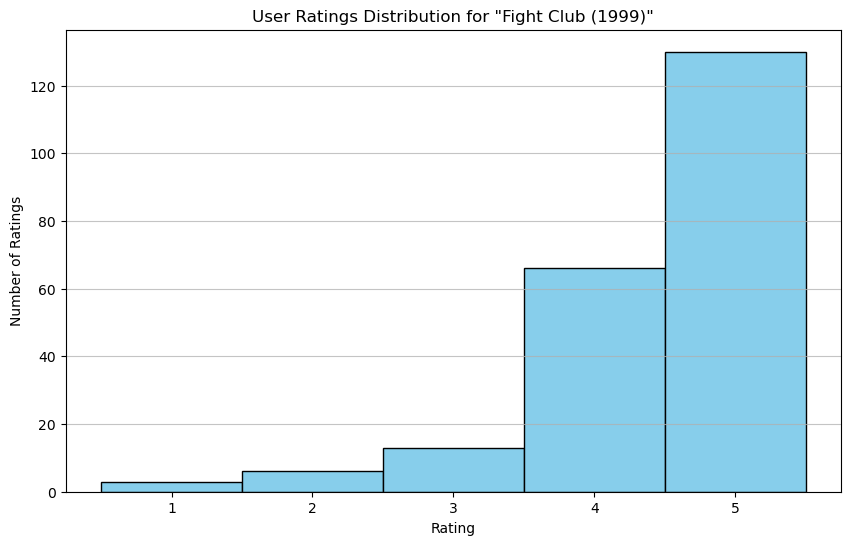

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Filter movies to get the movieId for "Fight Club (1999)"
fight_club_movie_id = movies_df.loc[movies_df['title'] == 'Fight Club (1999)', 'movieId'].values[0]

# Filter ratings for the specific movieId
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', color='skyblue')
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()


## 🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [9]:
import pandas as pd

# Load the ratings dataset
ratings_df = pd.read_csv('ratings.csv')  # Replace 'path_to_ratings.csv' with the actual path to your file

# Group user ratings based on movieId and apply aggregation operations
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

# Rename the columns for clarity
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# Load the movies dataset
movies_df = pd.read_csv('movies.csv')  # Replace 'path_to_movies.csv' with the actual path to your file

# Apply inner join on movies and grouped ratings dataframe
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

# Filter only those movies with more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

# Display the resulting dataframe
filtered_df.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


### Which movie is the most popular based on  average user ratings?

In [10]:
# Find the movie with the highest average user rating
most_popular_movie = filtered_df.loc[filtered_df['rating_mean'].idxmax()]

# Display the result
print("Most popular movie based on average user ratings:")
print("Movie Title:", most_popular_movie['title'])
print("Average Rating:", most_popular_movie['rating_mean'])

Most popular movie based on average user ratings:
Movie Title: Shawshank Redemption, The (1994)
Average Rating: 4.429022082018927


### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [11]:
# Sort the dataframe by rating_count in descending order
top5_popular_movies = filtered_df.sort_values(by='rating_count', ascending=False).head(5)

# Display the top 5 popular movies
print("Top 5 popular movies based on the number of user ratings:")
for index, row in top5_popular_movies.iterrows():
    print("Movie Title:", row['title'])
    print("Number of User Ratings:", row['rating_count'])
    print("---")


Top 5 popular movies based on the number of user ratings:
Movie Title: Forrest Gump (1994)
Number of User Ratings: 329
---
Movie Title: Shawshank Redemption, The (1994)
Number of User Ratings: 317
---
Movie Title: Pulp Fiction (1994)
Number of User Ratings: 307
---
Movie Title: Silence of the Lambs, The (1991)
Number of User Ratings: 279
---
Movie Title: Matrix, The (1999)
Number of User Ratings: 278
---


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [12]:
# Filter the dataframe to include only Sci-Fi movies
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

# Sort the Sci-Fi movies dataframe by rating_count in descending order
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

# Find the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]

# Display the result
print("Third most popular Sci-Fi movie based on the number of user ratings:")
print("Movie Title:", third_most_popular_sci_fi_movie['title'])
print("Number of User Ratings:", third_most_popular_sci_fi_movie['rating_count'])

Third most popular Sci-Fi movie based on the number of user ratings:
Movie Title: Jurassic Park (1993)
Number of User Ratings: 238


## 🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

In [13]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Read the links.csv file
links_df = pd.read_csv('links.csv')

# Step 2: Filter movies with more than 50 user ratings
filtered_links = links_df[links_df['movieId'].isin(filtered_df['movieId'])].copy()

# Step 3: Convert 'imdbId' to string and add leading zeros
filtered_links['imdbId'] = filtered_links['imdbId'].astype(str).str.zfill(7)

# Step 4: Construct URLs for IMDB pages
base_url = 'https://www.imdb.com/title/tt'
filtered_links['imdb_url'] = base_url + filtered_links['imdbId'] + '/reviews'

# Step 5: Scrape IMDB reviews
def scrape_reviews(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    reviews = soup.find_all('div', class_='text show-more__control')
    return [review.get_text() for review in reviews]

# Create a new column to store scraped reviews
filtered_links['reviews'] = filtered_links['imdb_url'].apply(scrape_reviews)

# Now, the 'reviews' column contains a list of reviews for each movie


In [14]:
filtered_links.head()

,movieId,imdbId,tmdbId,imdb_url,reviews
0,1,0114709,862.0,https://www.imdb.com/title/tt0114709/reviews,[Andy's toys live a reasonable life of fun and...
1,2,0113497,8844.0,https://www.imdb.com/title/tt0113497/reviews,"[Among the thousands of films I have viewed, t..."
2,3,0113228,15602.0,https://www.imdb.com/title/tt0113228/reviews,[Sequels are rarely half as good as the origin...
5,6,0113277,949.0,https://www.imdb.com/title/tt0113277/reviews,[Heat (1995) is a movie that is in my DVD coll...
6,7,0114319,11860.0,https://www.imdb.com/title/tt0114319/reviews,[I was surprised at how good this movie is. A ...


### Mention the movieId of the movie which has the highest IMDB rating.


In [15]:
#  Extract IMDB rating from each review URL
def extract_rating_from_url(url):
    try:
        return float(url.split('/')[4].split('_')[0][2:]) if 'tt' in url else None
    except ValueError:
        print(f"Error extracting rating from URL: {url}")
        return None

filtered_links['imdb_rating'] = filtered_links['imdb_url'].apply(extract_rating_from_url)

#  Find the movie with the highest IMDB rating
highest_rated_movie = filtered_links.loc[filtered_links['imdb_rating'].idxmax()]

# Print the movieId of the highest-rated movie
print("Movie with the highest IMDB rating:")
print("movieId:", highest_rated_movie['movieId'])
print("IMDB rating:", highest_rated_movie['imdb_rating'])

Movie with the highest IMDB rating:
movieId: 109374
IMDB rating: 2278388.0


### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.|

In [16]:
# Step 6: Merge DataFrames on 'movieId'
merged_df = pd.merge(filtered_links, movies_df, on='movieId', how='inner')

# Step 7: Filter Sci-Fi movies
scifi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi', case=False, na=False)]

# Step 8: Find the Sci-Fi movie with the highest IMDB rating
highest_rated_scifi_movie = scifi_movies.loc[scifi_movies['imdb_rating'].idxmax()]

# Print the movieId of the highest-rated Sci-Fi movie
print("Sci-Fi movie with the highest IMDB rating:")
print("movieId:", highest_rated_scifi_movie['movieId'])
print("IMDB rating:", highest_rated_scifi_movie['imdb_rating'])

Sci-Fi movie with the highest IMDB rating:
movieId: 112852
IMDB rating: 2015381.0
